In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# importing the libraries for plots
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#reading and loading the csv into dataframe
df_sales = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding = 'latin')
df_sales

In [ ]:
# Numbers of columns and rows in the dataframe
df_sales.shape

In [ ]:
# name of the columns in the dataframe
df_sales.columns

In [ ]:
# describe the numerical columns in the dataframe
df_sales.describe()

In [ ]:
# info about the dataframe
df_sales.info()

In [ ]:
# Cleaning the data set , removing the columns with max na values
df_sales_clean = df_sales.drop('STATE', axis=1)
df_sales_clean.head(5)

In [ ]:
# information about the dataframe 
df_sales_clean.info()

In [ ]:
# checking how many na values in every column of the dataframe
df_sales_clean.isnull().sum()

In [165]:
# converting datatype of data column from object to datetime
df_sales_clean['ORDERDATE'] = pd.to_datetime(df_sales_clean['ORDERDATE'])
 

In [ ]:
# checking null values in a dataframe
df_sales.isnull()

In [ ]:
# checking the sum of null values in the dataframe
df_sales.isnull().sum()

In [ ]:
# unique values check for a column
df_sales.TERRITORY.unique()

In [ ]:
df_sales.TERRITORY.hist()

In [ ]:
# to check the max value in a column
df_sales['QUANTITYORDERED'].max()

In [ ]:
# to check duplcated values
df_sales.duplicated()

In [ ]:
# sorting the values in asc or desc orderof a column
df_sales.sort_values(by = 'SALES', ascending = False).head(20).reset_index()

In [ ]:
# unique values for column productline
df_sales.PRODUCTLINE.unique()

In [ ]:
# Count of values for different products in column productline
df_sales['PRODUCTLINE'].value_counts()

In [ ]:
# groupby and agg function used 
group_sales= df_sales.groupby('PRODUCTLINE')[['QUANTITYORDERED','PRICEEACH','SALES']].max()
group_sales

In [ ]:
#checking rows with nan values
sales_df1 = df_sales.loc[(df_sales['TERRITORY']!='EMEA')& (df_sales['TERRITORY']!='APAC')& (df_sales['TERRITORY']!='Japan')]
sales_df1.COUNTRY.unique()

In [168]:
# replacing nan values in column with values nan
df_sales_clean['TERRITORY']=df_sales_clean['TERRITORY'].fillna('North America')
 

In [170]:
df_sales_clean['TERRITORY']= df_sales_clean['TERRITORY'].replace('Japan','APAC')

In [ ]:
#replacing values
df_sales['TERRITORY']=df_sales['TERRITORY'].replace('Japan','APAC')
 

In [172]:
#another way to check sum of nan values 
df_sales_clean["TERRITORY"].isna().sum()
 

0

#### Visualizations

In [ ]:
# Unique country names and their value count 
country_sorted=df_sales_clean['COUNTRY'].value_counts().sort_values().reset_index()
country_sorted

In [ ]:
#Bar plot for the different countries and their count 
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(data=country_sorted, x='COUNTRY', y='count', color='Cyan', label='Count of countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.clf()

#### Bar plot using seaborn and code for Top countries(10/20) for sales 

In [ ]:
# Top countries by sales value
country_sales = df_sales_clean.groupby('COUNTRY') ['SALES'].sum().reset_index()
country_sales
top_countries = country_sales.sort_values(by='SALES', ascending=False).head(10)
top_countries

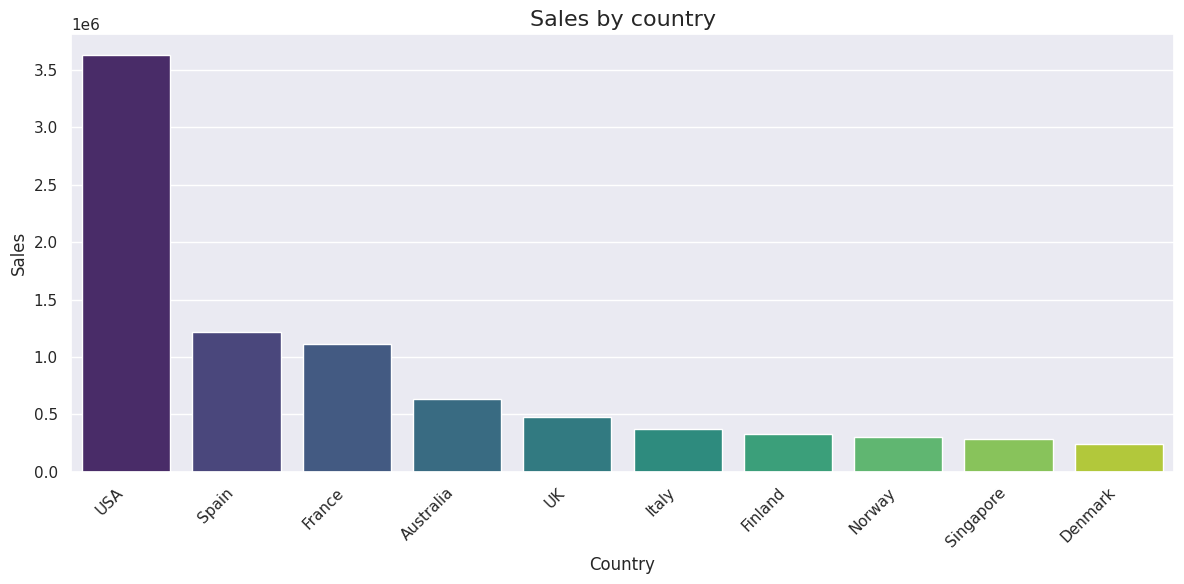

In [134]:
#Bar plot for top 10 countries for max sales
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=top_countries, x='COUNTRY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_sales_clean.info()

In [ ]:
df_sales_clean['YEAR_ID'].unique()

In [ ]:
# What are the total sales over the past years?
sales_year = df_sales_clean.groupby('YEAR_ID') ['SALES'].sum().reset_index()
sales_year

In [ ]:
# What are the total sales over the past year?
total_sales_past_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2005]['SALES'].sum()
total_sales_past_year

#### Bar plot 

In [ ]:
plt.figure(figsize=(6, 3))

# Create the bar plot
plt.bar(sales_year['YEAR_ID'], sales_year['SALES'], width = 0.3,color='orange', label='Sales')

# Title of the plot
plt.title("A bar plot for sales over the years")

# Add labels to the axes
plt.xlabel("Years")
plt.ylabel("Sales Amount")

# Add grid
plt.grid()

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Which product has the highest sales?
sales_product = df_sales_clean.groupby('PRODUCTLINE') ['SALES'].sum().reset_index()
sales_product

#### Bar plot for sales of the products
##### Adding data lables to the chart
In this code, the for loop iterates over each bar in the plot, retrieves its height using bar.get_height(), and places a text label at the top center of each bar using plt.text. The ha and va parameters are used to horizontally and vertically align the text.

In [ ]:
plt.figure(figsize=(10, 5))

# Create the bar plot
bars = plt.bar(sales_product['PRODUCTLINE'], sales_product['SALES'], width = 0.3,color='Teal', label='Sales')

# Title of the plot
plt.title("A bar plot for sales of the products")

# Add labels to the axes
plt.xlabel("Product")
plt.ylabel("Sales Amount")

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Add grid

# Add legend
plt.legend()

# Show the plot
plt.show()

#### Pie Chart of Sales Distribution by Product Line


In [ ]:
# Create the figure
plt.figure(figsize=(5, 5))

# Create the pie chart
plt.pie(sales_product['SALES'], labels=sales_product['PRODUCTLINE'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title of the plot
plt.title("Sales Distribution by Product Line")

# Show the plot
plt.show()

####  Box Plot of Sales by Product Line


In [ ]:
# Create the figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df_sales_clean, palette='Set3')

# Title of the plot
plt.title("Sales Distribution by Product Line")

# Add labels to the axes
plt.xlabel("Product Line")
plt.ylabel("Sales")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Heatmap of Sales by Month and Product Line


In [ ]:
# Pivot the data
sales_heatmap = df_sales_clean.pivot_table(values='SALES', index='PRODUCTLINE', columns='MONTH_ID', aggfunc='sum')
sales_heatmap

In [ ]:
# Create the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(sales_heatmap, annot=True, fmt=".1f", cmap='YlGnBu')

# Title of the plot
plt.title("Heatmap of Sales by Month and Product Line")

# Add labels to the axes
plt.xlabel("Month")
plt.ylabel("Product Line")

# Show the plot
plt.show()

In [ ]:
df_sales_clean.head(5)

In [ ]:
# What is the average order value?
order_average = df_sales_clean.groupby('ORDERNUMBER') ['QUANTITYORDERED'].mean().reset_index()
order_average
top_orders = order_average.sort_values(by='QUANTITYORDERED', ascending=False).head(20)
top_orders

In [ ]:
count1 = df_sales_clean['ORDERNUMBER'].nunique()
count1

In [ ]:
df_sales_clean.columns

####  Bar plot for the avarage order value for top order id's.

In [ ]:
# Create the figure
plt.figure(figsize=(12, 6))

# Create the bar plot
bars1 = plt.bar(top_orders['ORDERNUMBER'].astype(str), top_orders['QUANTITYORDERED'], color='skyblue')

# Title of the plot
plt.title("Top 20 Order Numbers by Average Quantity Ordered")

# Add labels to the axes
plt.xlabel("Order Number")
plt.ylabel("Average Quantity Ordered")

#Add data labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')



# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid
plt.grid(True)
plt.show()

##### How many unique customers made purchases?
- The unique function in pandas is used to find unique values in a Series, but it doesn’t directly help with grouping and summing quantities. 
- unique_customers will contain an array of unique customer names.
- customer_order_sum will be a DataFrame with each customer and their total quantity ordered.

In [ ]:
customer_order_sum = df_sales_clean.groupby('CUSTOMERNAME')['QUANTITYORDERED'].sum().reset_index()
customer_order_sum

In [ ]:
top_cust = customer_order_sum.sort_values(by='QUANTITYORDERED', ascending=False).head(20)
top_cust

In [ ]:
# Create the figure
plt.figure(figsize=(12, 6))

# Create the bar plot
bars2 = plt.bar(top_cust['CUSTOMERNAME'].astype(str), top_cust['QUANTITYORDERED'], color='#FFC305')

# Title of the plot
plt.title("Top 20 Customer Names by  Quantity Ordered")

# Add labels to the axes
plt.xlabel("Customer Name")
plt.ylabel("Total Quantity Ordered")

#Add data labels
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')



# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### Sales trend over the months for last year.

In [177]:
 #Filter data for the past year
sales_past_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2005]

# Group by month and sum sales
monthly_sales_trend = sales_past_year.groupby('MONTH_ID')['SALES'].sum().reset_index()


In [ ]:
df_sales_clean['YEAR_ID'].unique()

### Line Plot of Monthly Sales Trend

####  Adding data labels to your chart:-
##### In this code, the for loop iterates over each data point in the monthly_sales_trend DataFrame. The **plt.text** function is used to place the labels at the coordinates specified by the MONTH_ID and SALES columns. The ha (horizontal alignment) and va (vertical alignment) parameters ensure the labels are centered and positioned just above each data point.

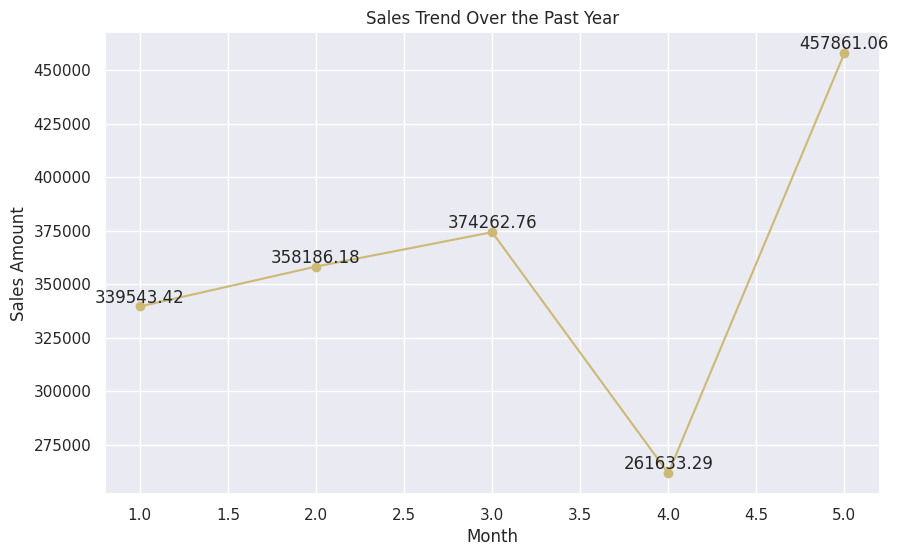

In [135]:
plt.figure(figsize=(10, 6))

# Plot the sales trend
plt.plot(monthly_sales_trend['MONTH_ID'], monthly_sales_trend['SALES'], marker='o', linestyle='-', color='y')

# Title of the plot
plt.title("Sales Trend Over the Past Year")

# Add labels to the axes
plt.xlabel("Month")
plt.ylabel("Sales Amount")

for i in range(len(monthly_sales_trend)):
    plt.text(monthly_sales_trend['MONTH_ID'][i], monthly_sales_trend['SALES'][i], 
             round(monthly_sales_trend['SALES'][i], 2), ha='center', va='bottom')


# Add grid
plt.grid(True)



In [179]:
region_2005 = sales_past_year.groupby('TERRITORY')['SALES'].sum().reset_index()
region_2005

,TERRITORY,SALES
0,APAC,190600.49
1,EMEA,929828.99
2,North America,671057.23


In [173]:
df_sales_clean.TERRITORY.unique()

array(['North America', 'EMEA', 'APAC'], dtype=object)

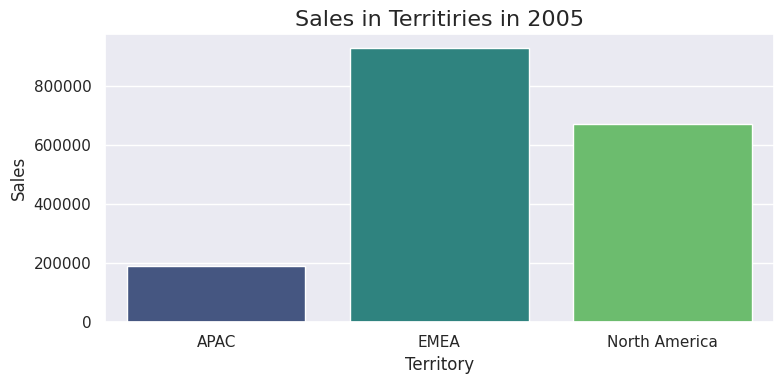

In [182]:
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,4))

#create the histogram
sns.barplot(data=region_2005, x='TERRITORY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales in Territiries in 2005', fontsize=16)
ax.set_xlabel('Territory', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [184]:
## sales trend for year 2004
sales_pas_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2004]

# Group by month and sum sales
month_sales_trend = sales_pas_year.groupby('MONTH_ID')['SALES'].sum().reset_index()

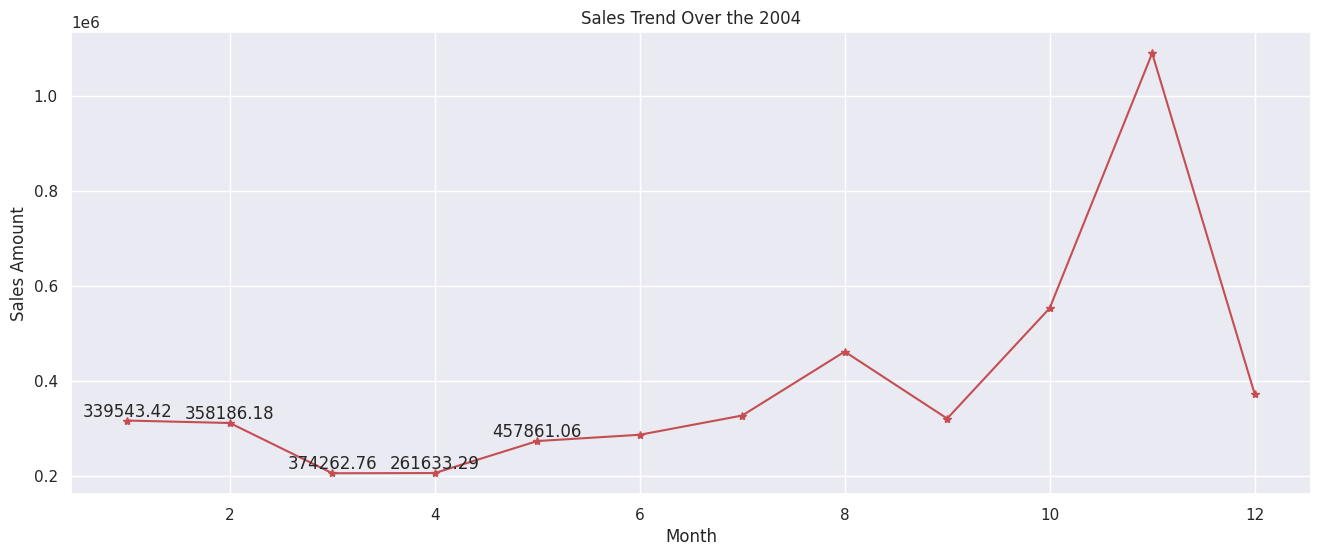

In [146]:
plt.figure(figsize=(16, 6))

# Plot the sales trend
plt.plot(month_sales_trend['MONTH_ID'], month_sales_trend['SALES'], marker='*', linestyle='-', color='r')

# Title of the plot
plt.title("Sales Trend Over the 2004")

# Add labels to the axes
plt.xlabel("Month")
plt.ylabel("Sales Amount")

for i in range(len(monthly_sales_trend)):
    plt.text(month_sales_trend['MONTH_ID'][i], month_sales_trend['SALES'][i], 
             round(monthly_sales_trend['SALES'][i], 2), ha='center', va='bottom')
# Add grid
plt.grid(True)

In [186]:
#regional sales in 2004
region_2004 = sales_pas_year.groupby('TERRITORY')['SALES'].sum().reset_index()
region_2004

,TERRITORY,SALES
0,APAC,513786.93
1,EMEA,2389128.89
2,North America,1821246.78


#### sales trend over months for year = 2003
- bar plot by using seaborn

In [188]:
## sales trend for year 2003
sale_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2003]

# Group by month and sum sales
month_sale_trend = sale_year.groupby('MONTH_ID')['SALES'].sum().reset_index()
month_sale_trend

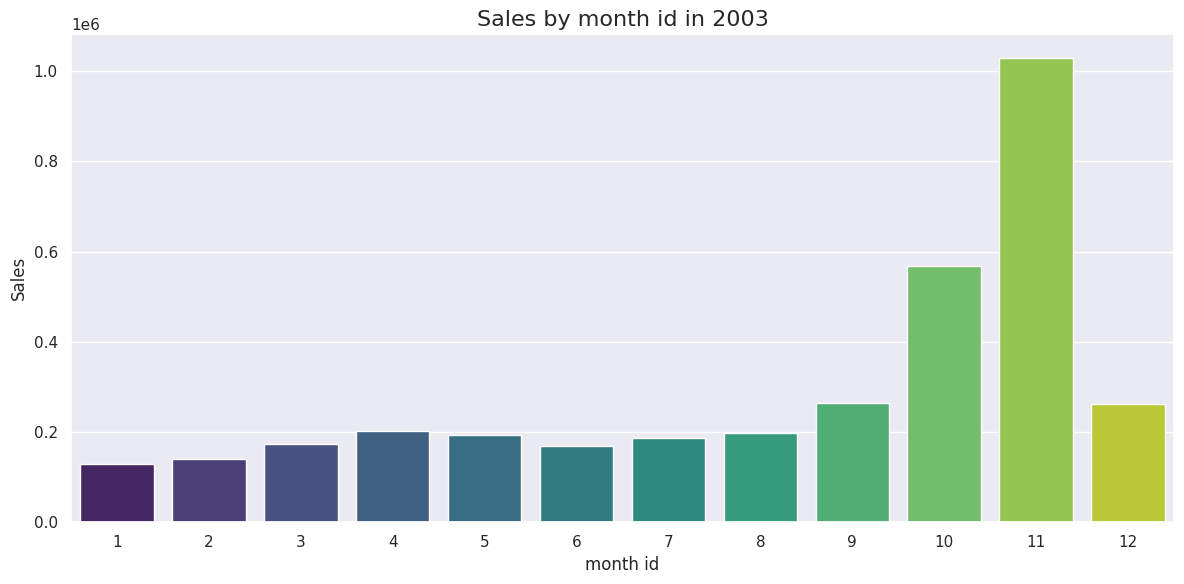

In [159]:
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=month_sale_trend, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2003', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [189]:
# regional sales for year 2003
region_2003 = sale_year.groupby('TERRITORY')['SALES'].sum().reset_index()